In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()

In [5]:
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind="bar",stacked=True)

In [6]:
tmp=train.head()

In [7]:
tmp1=tmp[tmp['Survived']==1]['Sex'].value_counts()
tmp2=tmp[tmp['Survived']==0]['Sex'].value_counts()
df=pd.DataFrame([tmp1,tmp2])

In [8]:
df.index=['Survived','Dead']

In [9]:
df

,female,male
Survived,3.0,NaN
Dead,NaN,2.0


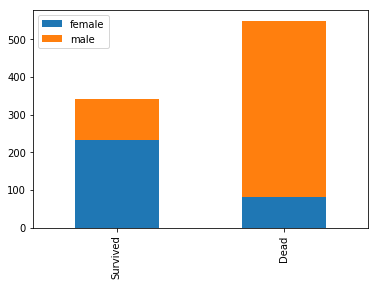

In [10]:
bar_chart('Sex')

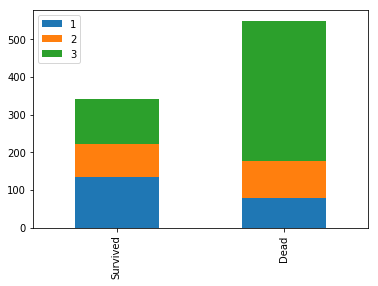

In [11]:
bar_chart('Pclass')

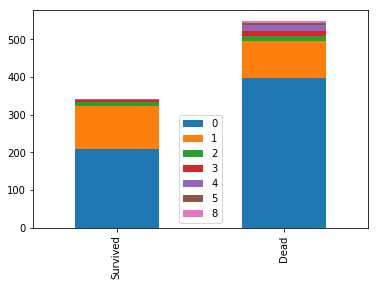

In [12]:
bar_chart('SibSp')

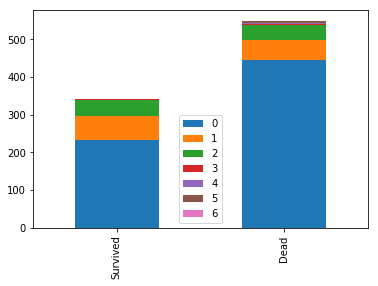

In [13]:
bar_chart('Parch')

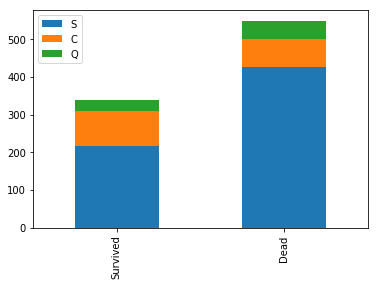

In [14]:
bar_chart('Embarked')

In [15]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Gale, Mr. Shadrach",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [16]:
train=train.drop(['Cabin','Ticket'],axis=1)
test=test.drop(['Cabin','Ticket'],axis=1);

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [18]:
# C = Cherbourg, Q = Queenstown, S = Southampton
southampton = train[train['Embarked']=='S']
queenstown = train[train['Embarked']=='Q']
cherbourg = train[train['Embarked']=='C']
print('S :',southampton.shape[0]) #shape[0] ~ len
print('Q :',queenstown.shape[0])
print('C :',cherbourg.shape[0])

S : 644
Q : 77
C : 168


In [ ]:
train=train.fillna({'Embarked': 'S'})

In [ ]:
embarked_mapping={"S":1,"Q":2,"C":3}
train['Embarked']=train['Embarked'].map(embarked_mapping)
test['Embarked']=test['Embarked'].map(embarked_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1


In [ ]:
sex_mapping={"male":0,"female":1}
train['Sex']=train['Sex'].map(sex_mapping)
test['Sex']=test['Sex'].map(sex_mapping)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1


In [ ]:
combine=[train,test]
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
    
pd.crosstab(train['Title'],train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [ ]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare')
    dataset['Title']=dataset['Title'].replace(['Countess','Lady','Sir'],'Royal')
    dataset['Title']=dataset['Title'].replace(['Mlle','Ms'],'Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')

train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


In [ ]:
title_mapping={'Mr':1,"Miss":2,"Mrs":3,"Master":4,"Royal":5,"Rare":6}
for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)

In [ ]:
train=train.drop(['PassengerId','Name'],axis=1)
test=test.drop(['PassengerId','Name'],axis=1)

In [ ]:
train['Age']=train['Age'].fillna(-0.5)
test['Age']=test['Age'].fillna(-0.5)
bins=[-1, 0, 5, 12, 18, 24, 35, 60, np.Inf]
labels=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Senior']
train['AgeGroup']=pd.cut(train['Age'],bins,labels=labels)
test['AgeGroup']=pd.cut(test['Age'],bins,labels=labels)

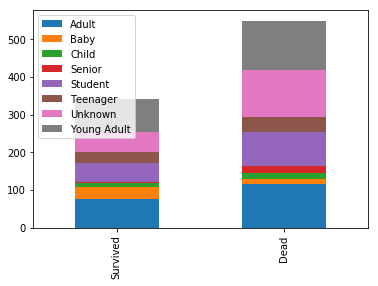

In [ ]:
bar_chart('AgeGroup')

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,1,1,Student
1,1,1,1,38.0,1,0,71.2833,3,3,Adult
2,1,3,1,26.0,0,0,7.9250,1,2,Young Adult
3,1,1,1,35.0,1,0,53.1000,1,3,Young Adult
4,0,3,0,35.0,0,0,8.0500,1,1,Young Adult


In [ ]:
# title_mapping={'Mr':1,"Miss":2,"Mrs":3,"Master":4,"Royal":5,"Rare":6}
# labels=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Senior']

age_title_mapping={1:'Young Adult',2:'Student',3:'Adult',4:'Baby',5:'Adult',6:'Adult'}
for x in range(len(train['AgeGroup'])):
    if train['AgeGroup'][x]=='Unknown':
        train['AgeGroup'][x]=age_title_mapping[train['Title'][x]]
        
for x in range(len(test['AgeGroup'])):
    if test['AgeGroup'][x]=='Unknown':
        test['AgeGroup'][x]=age_title_mapping[test['Title'][x]]
        
age_mapping={'Baby':1,'Child':2,'Teenager':3,'Student':4,'Young Adult':5,'Adult':6,'Senior':7}
train['AgeGroup']=train['AgeGroup'].map(age_mapping)
test['AgeGroup']=test['AgeGroup'].map(age_mapping)

train['FareBand']=pd.qcut(train['Fare'],4,labels=[1,2,3,4])
test['FareBand']=pd.qcut(test['Fare'],4,labels=[1,2,3,4])

train=train.drop(['Age','Fare'],axis=1)
test=test.drop(['Age','Fare'],axis=1)

In [ ]:
import tensorflow as tf

In [ ]:
y_data=train['Survived'].values
y_data=y_data.reshape(len(y_data),1)
x_data=train[['Pclass','Sex','SibSp','Parch','Embarked','Title','AgeGroup','FareBand']].values
x_test_data=test.values.astype(float)

In [ ]:
X=tf.placeholder(tf.float32,shape=[None,8])
Y=tf.placeholder(tf.float32,shape=[None,1])

In [ ]:
W=tf.Variable(tf.random_normal([8,1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name='bias')

hypothesis=tf.sigmoid(tf.matmul(X,W)+b)
cost=-tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))
training=tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

In [ ]:
predicted=tf.cast(hypothesis>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype=tf.float32))

sess=tf.Session()
sess.run(tf.global_variables_initializer())

feed={X:x_data,Y:y_data}
for step in range(10001):
    sess.run(training,feed_dict=feed)
    if step%1000==0:
        print(step,sess.run(cost,feed_dict=feed))

h,c,a=sess.run([hypothesis,cost,accuracy],feed_dict=feed)
print("cost : ",c,"\naccuracy : ",a)

In [ ]:
predictions=tf.cast(hypothesis>0.5, dtype=tf.int32)
results=sess.run(predictions,feed_dict={X: x_test_data})

test_data_origin = pd.read_csv("./test.csv")
submission=pd.DataFrame({
    'PassengerId':test_data_origin['PassengerId'],
    'Survived':results.reshape(1,418)[0]
})
submission.to_csv('submission.csv',index=False)